In [1]:
import numpy as np

from mpl_toolkits.mplot3d import Axes3D


from matplotlib import pyplot as plt

In [7]:
from scipy.fftpack import fft
 
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

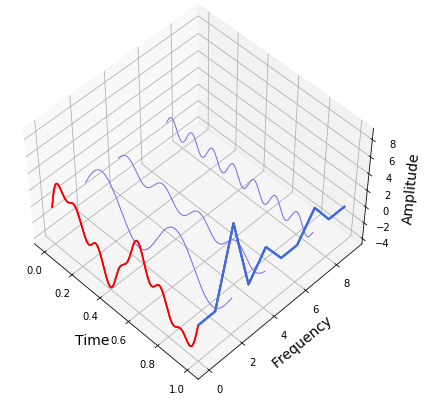

In [11]:

N = 1000
T = 1 / N
f_s = 1/T
ts = 1.0/N

t = np.arange(0,1,ts)
freq = 2
amp = 3*np.sin(2*np.pi*freq*t)
freq = 4
amp += np.sin(2*np.pi*freq*t)
freq = 7   
amp += 1* np.sin(2*np.pi*freq*t)


x_value = np.linspace(0,1,N) 
amplitudes = [0,3, 1, 1]
frequencies = [0, 2, 4, 7]

#y_values base on frequencies and amplitudes
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]

#add ys together
total_y = np.sum(y_values, axis=0)
 
f_values, fft_values = get_fft_values(total_y, T, N, f_s)

colors = ['mediumslateblue', 'mediumslateblue','mediumslateblue', 'mediumslateblue']
    # color collection: mediumslateblue , darkgoldenrod ,
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

y_values_ = [total_y] + list(reversed(y_values))

Interval = [0,7,4,2]

for ii in range(1,len(Interval)):
    signal = y_values_[ii]
    color = colors[ii]
    length = signal.shape[0]
    x=np.linspace(0,1,1000)
    y=np.array([Interval[ii]]*length)
    z=signal
    
    #sinusoids 
    ax.plot(list(x), list(y), zs=list(z),linewidth=1, color=color)
    x=[1]*10
    y=f_values[:10]
    z = fft_values[:10]*3
    
    #signal 
    x1 = t
    y1 = amp
    ax.plot(x1, np.zeros_like(x1), y1, 'r')# plot signal
    
    #frequence domain graph
    ax.plot(list(x), list(y), zs=list(z), linewidth=2, color='royalblue')
    plt.tight_layout(pad=3.0)
 
ax.view_init(azim=-45, elev=50)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Frequency ", fontsize=14)
ax.set_zlabel("Amplitude", fontsize=14)

fig.savefig("3D_FT.jpg", dpi=250)    
plt.show()


